In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
data = pd.read_csv("Dataset/data.csv")

In [3]:
data.head()

Unnamed: 0  gene_0    gene_1    gene_2    gene_3     gene_4  gene_5  \
0   sample_0     0.0  2.017209  3.265527  5.478487  10.431999     0.0   
1   sample_1     0.0  0.592732  1.588421  7.586157   9.623011     0.0   
2   sample_2     0.0  3.511759  4.327199  6.881787   9.870730     0.0   
3   sample_3     0.0  3.663618  4.507649  6.659068  10.196184     0.0   
4   sample_4     0.0  2.655741  2.821547  6.539454   9.738265     0.0   

     gene_6    gene_7  gene_8  ...  gene_20521  gene_20522  gene_20523  \
0  7.175175  0.591871     0.0  ...    4.926711    8.210257    9.723516   
1  6.816049  0.000000     0.0  ...    4.593372    7.323865    9.740931   
2  6.972130  0.452595     0.0  ...    5.125213    8.127123   10.908640   
3  7.843375  0.434882     0.0  ...    6.076566    8.792959   10.141520   
4  6.566967  0.360982     0.0  ...    5.996032    8.891425   10.373790   

   gene_20524  gene_20525  gene_20526  gene_20527  gene_20528  gene_20529  \
0    7.220030    9.119813   12.003135    9.650743    8.921326    5.286759   
1    6.256586    8.381612   12.674552   10.517059    9.397854    2.094168   
2    5.401607    9.911597    9.045255    9.788359   10.090470    1.683023   
3    8.942805    9.601208   11.392682    9.694814    9.684365    3.292001   
4    7.181162    9.846910   11.922439    9.217749    9.461191    5.110372   

   gene_20530  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  

[5 rows x 20532 columns]

In [4]:
data.shape

(801, 20532)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 20532 entries, Unnamed: 0 to gene_20530
dtypes: float64(20531), object(1)
memory usage: 125.5+ MB


In [6]:
data.rename(columns = {"Unnamed: 0": "sample_id"}, inplace=True)

In [7]:
sample_id = data['sample_id']
data = data.drop(columns=['sample_id'])

In [8]:
np.sum(data.isnull().sum())

0

In [9]:
data.std()[data.std()==0]

gene_5        0.0
gene_23       0.0
gene_4370     0.0
gene_4808     0.0
gene_4809     0.0
             ... 
gene_18915    0.0
gene_19450    0.0
gene_19451    0.0
gene_19452    0.0
gene_19671    0.0
Length: 267, dtype: float64

In [10]:
i = data.std()[data.std()==0].index.to_list()

In [11]:
data[i].min().sum()

0.0

In [12]:
data[i].max().sum()

0.0

In [13]:
data = data.drop(columns = i)

In [14]:
labels = pd.read_csv("Dataset/labels.csv")
labels.head()

Unnamed: 0 Class
0   sample_0  PRAD
1   sample_1  LUAD
2   sample_2  PRAD
3   sample_3  PRAD
4   sample_4  BRCA

In [15]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  801 non-null    object
 1   Class       801 non-null    object
dtypes: object(2)
memory usage: 12.6+ KB


In [16]:
labels.shape

(801, 2)

In [17]:
labels['Class'].value_counts()

BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: Class, dtype: int64

In [18]:
labels.rename(columns = {"Unnamed: 0": "sample_id"}, inplace=True)

In [19]:
def maplabels(labelname):
    
    if labelname == "BRCA":
        return 0
    elif labelname == "KIRC":
        return 1
    elif labelname == "LUAD":
        return 2
    elif labelname == "PRAD":
        return 3
    elif labelname == "COAD":
        return 4
    

In [20]:
labels['Class'] = labels['Class'].apply(lambda x: maplabels(x))

In [21]:
labels.head()

sample_id  Class
0  sample_0      3
1  sample_1      2
2  sample_2      3
3  sample_3      3
4  sample_4      0

In [22]:
labels['Class'].value_counts()

0    300
1    146
2    141
3    136
4     78
Name: Class, dtype: int64

In [23]:
data['sample_id'] = sample_id

In [24]:
data = data.merge(labels,on="sample_id", how = "outer")

In [25]:
data.head()

gene_0    gene_1    gene_2    gene_3     gene_4    gene_6    gene_7  \
0     0.0  2.017209  3.265527  5.478487  10.431999  7.175175  0.591871   
1     0.0  0.592732  1.588421  7.586157   9.623011  6.816049  0.000000   
2     0.0  3.511759  4.327199  6.881787   9.870730  6.972130  0.452595   
3     0.0  3.663618  4.507649  6.659068  10.196184  7.843375  0.434882   
4     0.0  2.655741  2.821547  6.539454   9.738265  6.566967  0.360982   

   gene_8  gene_9   gene_10  ...  gene_20523  gene_20524  gene_20525  \
0     0.0     0.0  0.591871  ...    9.723516    7.220030    9.119813   
1     0.0     0.0  0.000000  ...    9.740931    6.256586    8.381612   
2     0.0     0.0  0.000000  ...   10.908640    5.401607    9.911597   
3     0.0     0.0  0.000000  ...   10.141520    8.942805    9.601208   
4     0.0     0.0  0.000000  ...   10.373790    7.181162    9.846910   

   gene_20526  gene_20527  gene_20528  gene_20529  gene_20530  sample_id  \
0   12.003135    9.650743    8.921326    5.286759         0.0   sample_0   
1   12.674552   10.517059    9.397854    2.094168         0.0   sample_1   
2    9.045255    9.788359   10.090470    1.683023         0.0   sample_2   
3   11.392682    9.694814    9.684365    3.292001         0.0   sample_3   
4   11.922439    9.217749    9.461191    5.110372         0.0   sample_4   

   Class  
0      3  
1      2  
2      3  
3      3  
4      0  

[5 rows x 20266 columns]

In [26]:
data.to_csv("datacleaned.csv", index=False)

In [27]:
df = pd.read_csv("datacleaned.csv")

In [28]:
df.head()

gene_0    gene_1    gene_2    gene_3     gene_4    gene_6    gene_7  \
0     0.0  2.017209  3.265527  5.478487  10.431999  7.175175  0.591871   
1     0.0  0.592732  1.588421  7.586157   9.623011  6.816049  0.000000   
2     0.0  3.511759  4.327199  6.881787   9.870730  6.972130  0.452595   
3     0.0  3.663618  4.507649  6.659068  10.196184  7.843375  0.434882   
4     0.0  2.655741  2.821547  6.539454   9.738265  6.566967  0.360982   

   gene_8  gene_9   gene_10  ...  gene_20523  gene_20524  gene_20525  \
0     0.0     0.0  0.591871  ...    9.723516    7.220030    9.119813   
1     0.0     0.0  0.000000  ...    9.740931    6.256586    8.381612   
2     0.0     0.0  0.000000  ...   10.908640    5.401607    9.911597   
3     0.0     0.0  0.000000  ...   10.141520    8.942805    9.601208   
4     0.0     0.0  0.000000  ...   10.373790    7.181162    9.846910   

   gene_20526  gene_20527  gene_20528  gene_20529  gene_20530  sample_id  \
0   12.003135    9.650743    8.921326    5.286759         0.0   sample_0   
1   12.674552   10.517059    9.397854    2.094168         0.0   sample_1   
2    9.045255    9.788359   10.090470    1.683023         0.0   sample_2   
3   11.392682    9.694814    9.684365    3.292001         0.0   sample_3   
4   11.922439    9.217749    9.461191    5.110372         0.0   sample_4   

   Class  
0      3  
1      2  
2      3  
3      3  
4      0  

[5 rows x 20266 columns]

In [29]:
df.set_index('sample_id',inplace= True)

#### Plot the merged dataset as a hierarchically-clustered heatmap to see if the five classes of genes are shown distinctively to see their existence

In [30]:
import scipy.spatial as sp
import scipy.cluster.hierarchy as hc

In [31]:
df_cluster = df.drop(columns = ['Class'])

In [32]:
df_genes = df_cluster.T.copy()

In [33]:
df_genes = (df_genes - df_genes.mean())/df_genes.std()

In [34]:
df_samples = df_cluster.copy()

In [35]:
linkage_cols_pearson = hc.linkage(sp.distance.pdist(df_cluster.T,metric='correlation'), method = 'complete')
linkage_rows_pearson = hc.linkage(sp.distance.pdist(df_cluster,metric='correlation'), method = 'complete')

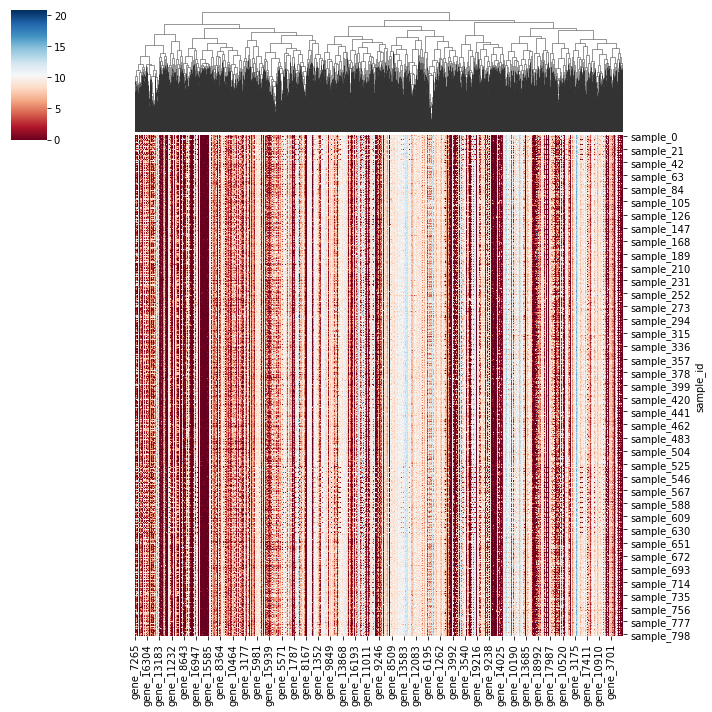

In [36]:
sns.clustermap(df.drop(columns = ['Class']), row_cluster=False, col_linkage=linkage_cols_pearson, cmap = 'RdBu')

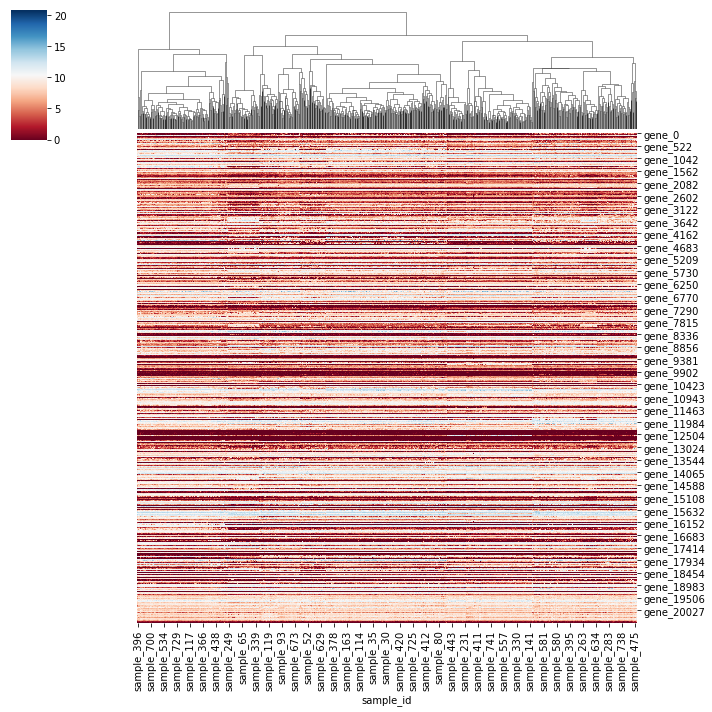

In [53]:
sns.clustermap(df.drop(columns = ['Class']).T, row_cluster=False, col_linkage=linkage_rows_pearson, cmap = 'RdBu')

Five clusters can be seen here

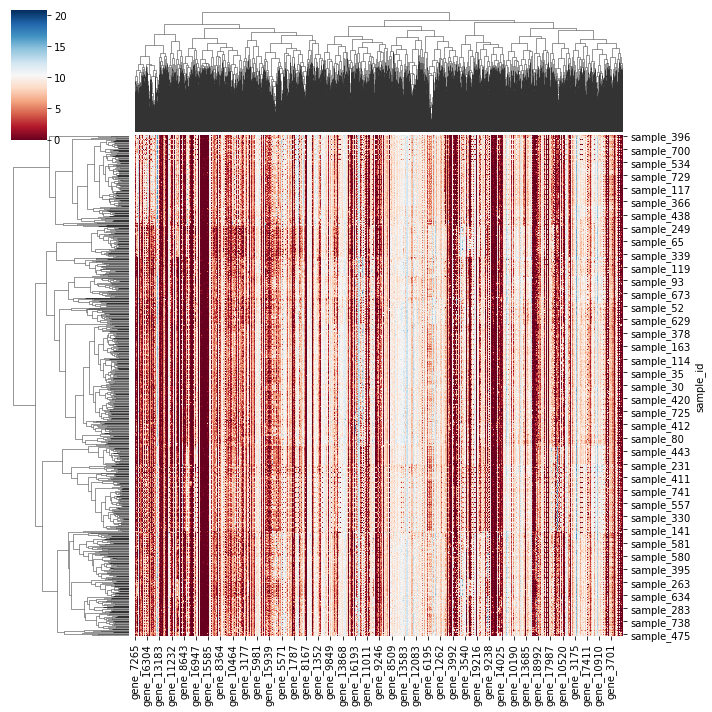

In [51]:
sns.clustermap(df.drop(columns = ['Class']), row_linkage=linkage_rows_pearson, col_linkage=linkage_cols_pearson, cmap = 'RdBu')

In [37]:
linkage_cols = hc.linkage(sp.distance.pdist(df_genes), method='ward')
linkage_rows = hc.linkage(sp.distance.pdist(df_samples), method='ward')

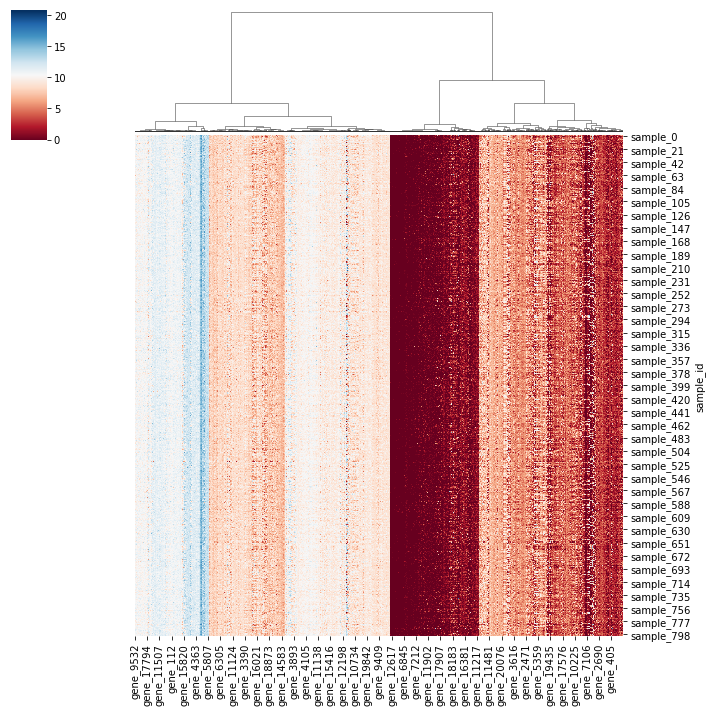

In [44]:
sns.clustermap(df.drop(columns = ['Class']), row_cluster=False, col_linkage=linkage_cols, cmap = 'RdBu')
plt.savefig("gene_cluster.png")

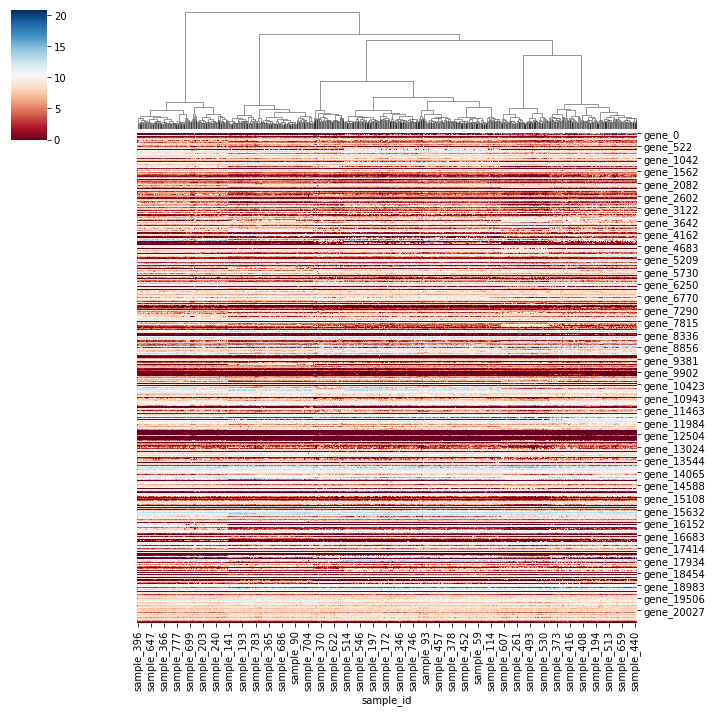

In [47]:
sns.clustermap(df.drop(columns = ['Class']).T, row_cluster=False, col_linkage=linkage_rows, cmap = 'RdBu')
plt.savefig('row_cluster.png')

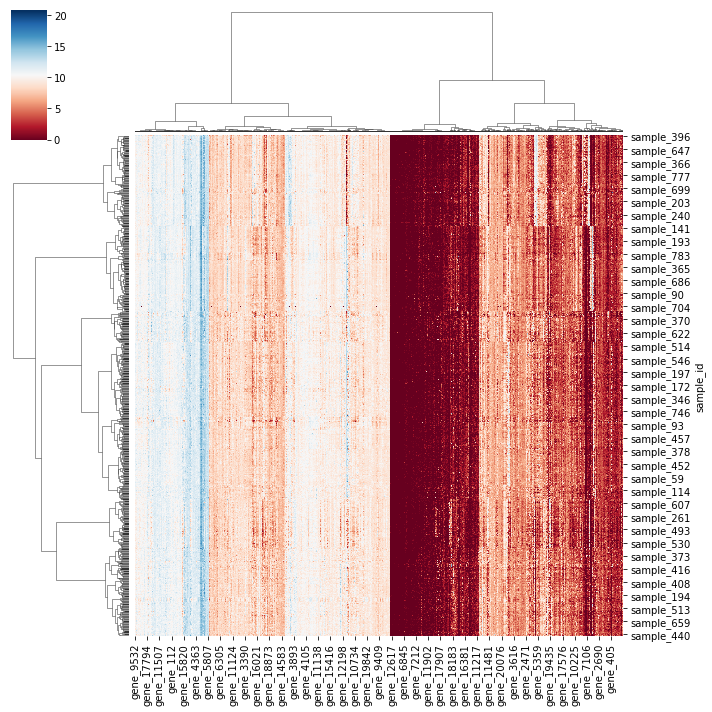

In [46]:
sns.clustermap(df.drop(columns = ['Class']), row_linkage=linkage_rows, col_linkage=linkage_cols, cmap = 'RdBu')
plt.savefig("complete_cluster.png")

#### 3. Choose 5 to 10 columns at random and plot another hierarchically-clustered heatmap for them to recheck if the five classes of genes are shown distinctively to see their existence

In [48]:
cols = df.drop(columns=['Class']).columns.to_list()

In [49]:
rand_cols = np.random.choice(cols, size=10)

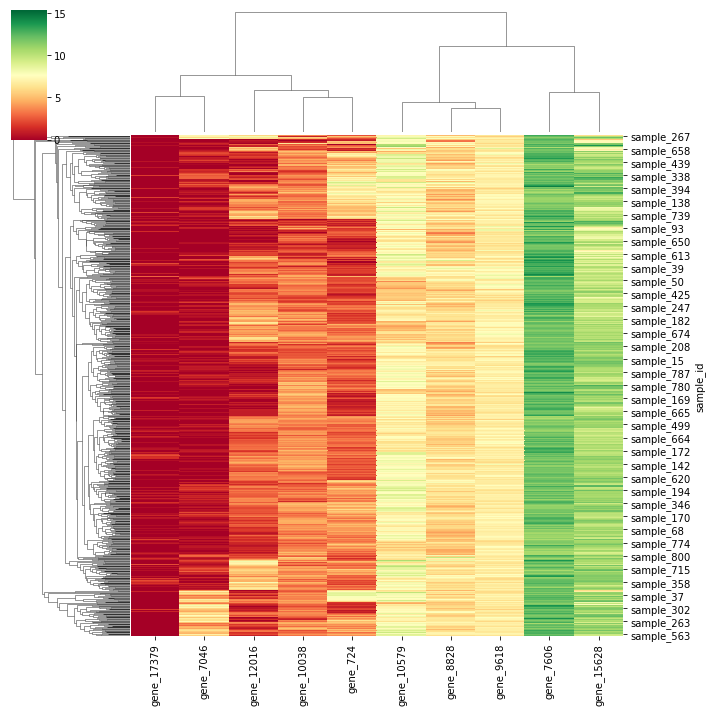

In [50]:
sns.clustermap(df[rand_cols], cmap = "RdYlGn")
plt.savefig("rand_cluster.png")

In [56]:
rand_cols_15 = np.random.choice(cols, size=15)

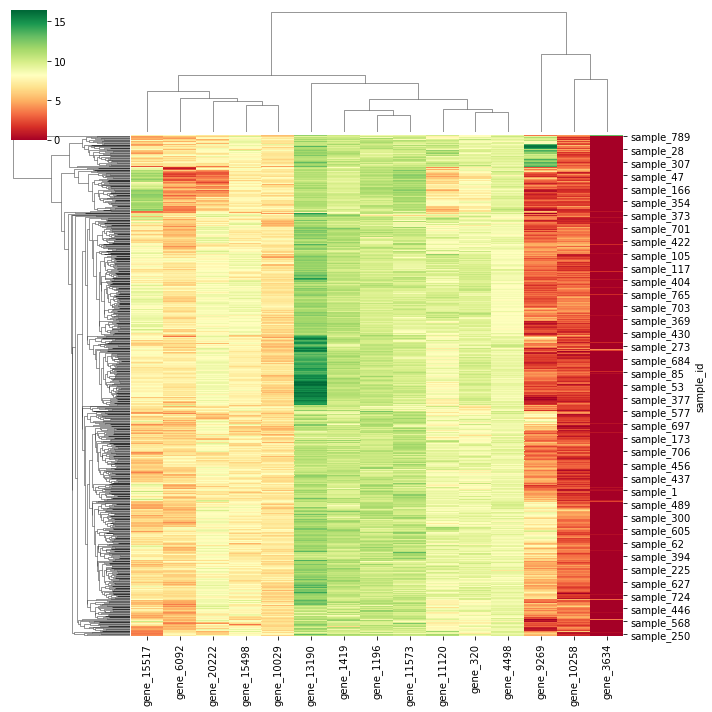

In [57]:
sns.clustermap(df[rand_cols_15], cmap = "RdYlGn")
plt.savefig("rand_cluster_15.png")

Save linkages for week 3 analysis

In [59]:
np.save("gene_linkage.npy", linkage_cols)
np.save("sample_linkage.npy", linkage_rows)
np.save("gene_linkage_pearson.npy", linkage_cols_pearson)
np.save("sample_linkage_pearson.npy", linkage_rows_pearson)

#### 4. Perform null-hypothesis test using ANOVA test for the genes for any five columns

1. Select 5 random genes with their expressions

In [87]:
from scipy.stats import f
from scipy.stats import f_oneway

In [63]:
anova_genes = np.random.choice(cols,size=5)

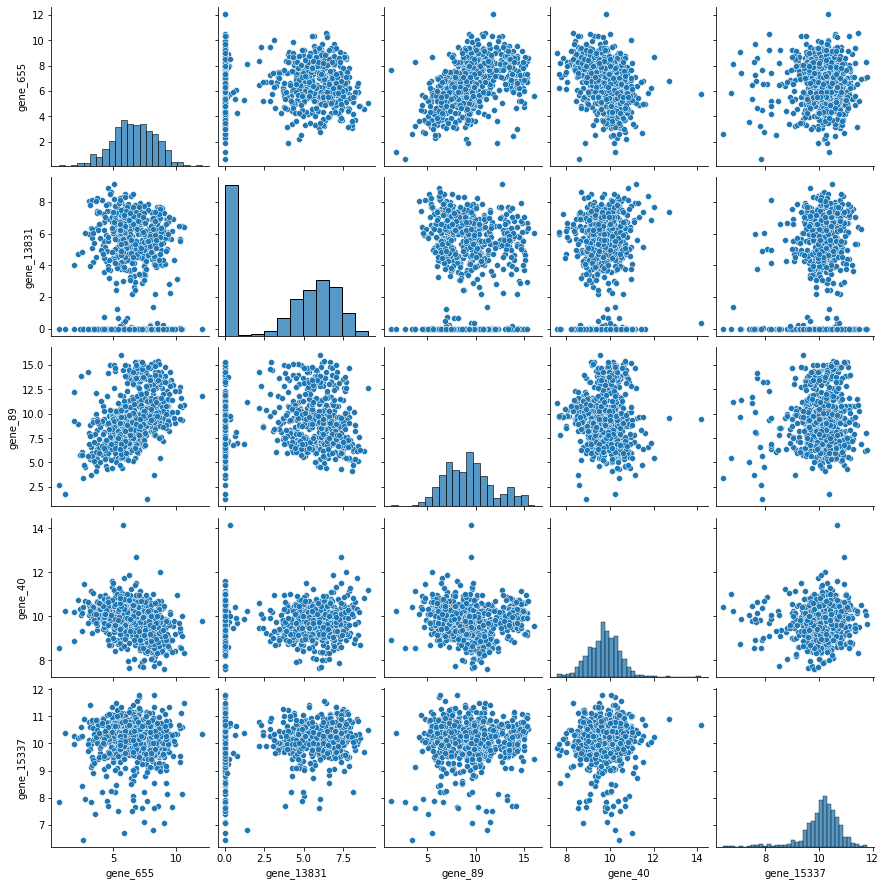

In [65]:
sns.pairplot(df[anova_genes])
plt.savefig("genes_pp.png")

These geneas are approximately normal

In [68]:
df_anova = df[anova_genes]

In [69]:
df_anova.shape

(801, 5)

In [86]:
df_anova.mean()

gene_655       6.602107
gene_13831     3.623530
gene_89        9.340963
gene_40        9.745688
gene_15337    10.107849
dtype: float64

In [76]:
n_groups = df_anova.shape[1]
n_each_group = df_anova.shape[0]
df_bw_group = n_groups - 1
total_mean = np.sum(df_anova).sum()/(n_groups*n_each_group)
each_group_mean = np.mean(df_anova)
SS_between = n_each_group * np.sum((each_group_mean - total_mean)**2)
MS_between = SS_between/df_bw_group

C:\Users\91902\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3417: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [79]:
df_within_group = n_each_group * n_groups - 1
SS_within = np.sum((n_each_group - 1) * (np.std(df_anova)**2))
MS_within = SS_within/df_within_group

In [83]:
F = MS_between/MS_within
F

1553.0232562462402

In [84]:
p = p = 1-f.cdf(F, df_bw_group, df_within_group)
p

1.1102230246251565e-16

We reject the null hypothesis that all means are same with sufficient evidence. 

In [89]:
fvalue, pvalue = f_oneway(df_anova[anova_genes[0]], df_anova[anova_genes[1]], df_anova[anova_genes[2]], df_anova[anova_genes[3]], df_anova[anova_genes[4]])

In [91]:
fvalue

1549.5348658794333